# Business Understanding

# Data Understanding

# Data Preparation

In [1]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url = '/content/drive/MyDrive/sarcasm/dataset_sarkasme.xlsx'
df = pd.read_excel(url)
df = pd.DataFrame(df)
df.head()

,text,sarcasm
0,"Mungkin mereka lupa, presiden itu produk polit...",0
1,Salahnya dimana? Coba tanya,0
2,Ini sih parah...! Masa dari 10 lembaga survei ...,1
3,"Terbongkar wajah asli , dibongkar langsung s...",1
4,Anies gak level disandingkan dng Jokowi.. Data...,1


In [5]:
df["text"] = df["text"].astype("str")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     4400 non-null   object
 1   sarcasm  4400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
def pre_processing(text):
  text = text.lower()
  text = text.strip()
  text = re.sub(r'https?://\S+|www\.\S+','', text)
  text = re.sub(r'[-+]?[0-9]+','', text)
  text = re.sub(r'[^A-Za-z0-9\s!]', '', text)  # Menghapus semua karakter non-alphanumeric kecuali spasi dan tanda seru (!)
  return text
df['text'] = df['text'].apply(pre_processing)

df

,text,sarcasm
0,mungkin mereka lupa presiden itu produk politi...,0
1,salahnya dimana coba tanya,0
2,ini sih parah! masa dari lembaga survei anggo...,1
3,terbongkar wajah asli dibongkar langsung sa...,1
4,anies gak level disandingkan dng jokowi data s...,1
...,...,...
4395,kemarin aku setelah nyobain kopi nya warung ko...,0
4396,kata nya tidur yang baik itu minimal enam jam ...,0
4397,indonesia itu ada di benua asia,0
4398,salah satu kegemaran anak remaja indonesia sek...,0


In [8]:
df.isnull().sum()

text       0
sarcasm    0
dtype: int64

In [9]:
df.isna().sum()

text       0
sarcasm    0
dtype: int64

In [10]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.2 MB/s eta 0:00:00


In [11]:
sentences = df.text.values
labels = df.sarcasm.values

## Mengunduh dataset khusus Training

In [12]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan (60%) dan data sisanya (40%) yang akan menjadi gabungan dari data validasi dan data pengujian
train_input, temp_input, train_labels, temp_labels = train_test_split(
    sentences, labels, random_state=42, test_size=0.4
)

# Bagi data sisanya menjadi data validasi (50%) dan data pengujian (50%)
validation_input, test_input, validation_labels, test_labels = train_test_split(
    temp_input, temp_labels, random_state=42, test_size=0.5
)

In [13]:
import pandas as pd
test_data_pra = pd.DataFrame({'Text': test_input, 'Label': test_labels})
test_data_pra.to_excel('data_test_pra.xlsx', index=False)

In [14]:
test_data_pra.head()

,Text,Label
0,saatnya menggatot!!!!,1
1,bukti jokowi orang nya jauh lebih rendah hati,0
2,yap! saat ini aku tidak punya tenaga untuk ber...,1
3,kalian bangga punya presiden bermuka norak sep...,1
4,rumah makan nya enak masakan nya lengkap dan ...,0


## Tokenisasi BERT

In [15]:
# from transformers import BertTokenizer

# print("Loading BERT Tokenizer")
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

In [16]:
from transformers import BertTokenizer

print("Loading BERT Tokenizer")
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

Loading BERT Tokenizer


In [17]:
print("Original: ", sentences[0])

print("Tokenized: ", bert_tokenizer.tokenize(sentences[0]))

print("Token IDS: ", bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(sentences[0])))

Original:  mungkin mereka lupa presiden itu produk politik yang mengakar dari partai politik kalau seorang presiden mendukung kader yang diusung partai politiknya lalu salahnya dimana  this is how politics works!
Tokenized:  ['mungkin', 'mereka', 'lupa', 'presiden', 'itu', 'produk', 'politik', 'yang', 'mengak', '##ar', 'dari', 'partai', 'politik', 'kalau', 'seorang', 'presiden', 'mendukung', 'kader', 'yang', 'diusung', 'partai', 'politiknya', 'lalu', 'salahnya', 'dimana', 'this', 'is', 'how', 'polit', '##ics', 'work', '##s', '!']
Token IDS:  [647, 267, 2516, 1871, 137, 497, 1681, 34, 2653, 12, 98, 2304, 1681, 599, 596, 1871, 2413, 7932, 34, 15583, 2304, 21194, 629, 8999, 1262, 5379, 374, 11088, 8962, 7291, 6055, 30362, 30457]


In [18]:
input_ids = []
for sent in sentences:
  encoded_sent = bert_tokenizer.encode(
      sent,
      add_special_tokens= True
  )
  input_ids.append(encoded_sent)

print("Original: ", sentences[0])
print("Token IDs: ", input_ids[0])

Original:  mungkin mereka lupa presiden itu produk politik yang mengakar dari partai politik kalau seorang presiden mendukung kader yang diusung partai politiknya lalu salahnya dimana  this is how politics works!
Token IDs:  [2, 647, 267, 2516, 1871, 137, 497, 1681, 34, 2653, 12, 98, 2304, 1681, 599, 596, 1871, 2413, 7932, 34, 15583, 2304, 21194, 629, 8999, 1262, 5379, 374, 11088, 8962, 7291, 6055, 30362, 30457, 3]


In [19]:
print("Max sentences length: ", max([len(sen) for sen in input_ids]))

Max sentences length:  202


In [20]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [21]:
from keras_preprocessing.sequence import pad_sequences

MAX_LEN = 202

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(bert_tokenizer.pad_token, bert_tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/truncating all sentences to 202 values
Padding token: "[PAD]", ID: 0
Done


In [22]:
input_ids[0]

array([    2,   647,   267,  2516,  1871,   137,   497,  1681,    34,
        2653,    12,    98,  2304,  1681,   599,   596,  1871,  2413,
        7932,    34, 15583,  2304, 21194,   629,  8999,  1262,  5379,
         374, 11088,  8962,  7291,  6055, 30362, 30457,     3,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [23]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0)for token_id in sent]

  attention_mask.append(att_mask)

# Pemodelan Data 1

Pembagian Data 60:20:20

Size_batch = 16

Epoch = 3

lr = 2e-5

eps = 1e-8

In [24]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan (60%) dan data sisanya (40%) yang akan menjadi gabungan dari data validasi dan data pengujian
train_input, temp_input, train_labels, temp_labels, train_mask, temp_mask = train_test_split(
    input_ids, labels, attention_mask, random_state=42, test_size=0.4
)

# Bagi data sisanya menjadi data validasi (50%) dan data pengujian (50%)
validation_input, test_input, validation_labels, test_labels, validation_mask, test_mask = train_test_split(
    temp_input, temp_labels, temp_mask, random_state=42, test_size=0.5
)


In [25]:
print("==Train==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("==Validation==")
print("Input: ", validation_input.shape)
print("Label: ", validation_labels.shape)
print("Mask: ", np.array(validation_mask).shape)

print("==Test==")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

==Train==
Input:  (2640, 202)
Label:  (2640,)
Mask:  (2640, 202)
==Validation==
Input:  (880, 202)
Label:  (880,)
Mask:  (880, 202)
==Test==
Input:  (880, 202)
Label:  (880,)
Mask:  (880, 202)


In [26]:
import torch

train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [27]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

batch_size = 16

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

## Pemodelan pre-trained BERT

In [28]:
torch.cuda.is_available()

True

In [29]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p1',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
model.to(device)
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [31]:
from transformers import get_linear_schedule_with_warmup

epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps
                                            )

In [32]:
def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [33]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

## Training BERT

In [34]:
device = torch.device("cuda:0")

In [35]:
# Karena menggunakan tugas klasifikasi biner (sarkasme atau bukan sarkasme)
loss_fn = torch.nn.CrossEntropyLoss()

In [36]:
import random

# Set seed untuk reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# List untuk menyimpan data pelatihan dan validasi
loss_values = []
train_accuracy_values = []
validation_accuracy_values = []
validation_loss_values = []  # Tambah list untuk menyimpan validation loss
training_times = []

# Loop pelatihan
for epoch_i in range(0, epochs):

  #===============================
  #          Training
  #===============================

    print("======== Epoch {:} / {:} ========".format(epoch_i + 1, epochs))
    print("Training...")

    t0 = time.time()

    total_loss = 0

    model.train()

    # Inisialisasi akurasi training untuk setiap epoch
    total_train_accuracy = 0
    total_train_steps = 0

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print("Batch {:>5,} of {:>5,}. Elapsed: {:}".format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

        # Hitung akurasi training untuk batch saat ini
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        batch_train_accuracy = flat_accuracy(logits, label_ids)

        total_train_accuracy += batch_train_accuracy
        total_train_steps += 1

    avg_train_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_train_loss)

    # Hitung rata-rata akurasi training untuk setiap epoch
    epoch_train_accuracy = total_train_accuracy / total_train_steps
    train_accuracy_values.append(epoch_train_accuracy)

    print("   Average training loss: {0:.2f}".format(avg_train_loss))
    print("   Training epoch took: {:}".format(format_time(time.time() - t0)))
    print("   Average training accuracy: {0:.2f}".format(epoch_train_accuracy))

  #===============================
  #          Validation
  #===============================

    # Validasi
    print("Running Validation...")

    t0 = time.time()

    total_validation_loss = 0
    total_validation_batches = 0

    model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:

        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

        # Hitung validation loss
        eval_loss = loss_fn(outputs[0], b_labels)  # Gantilah loss_fn dengan loss function yang sesuai
        eval_loss = eval_loss.mean().item()
        total_validation_loss += eval_loss
        total_validation_batches += 1

    # Simpan data akurasi dan waktu validasi
    validation_accuracy_values.append(eval_accuracy / nb_eval_steps)
    training_times.append(time.time() - t0)
    avg_validation_loss = total_validation_loss / total_validation_batches
    validation_loss_values.append(avg_validation_loss)

    print("   Accuracy: {0:.2f}".format(eval_accuracy / nb_eval_steps))
    print("   Validation Loss: {0:.2f}".format(avg_validation_loss))
    print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======== Epoch 1 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:23
Batch    80 of   165. Elapsed: 0:00:42
Batch   120 of   165. Elapsed: 0:01:03
Batch   160 of   165. Elapsed: 0:01:24
   Average training loss: 0.39
   Training epoch took: 0:01:26
   Average training accuracy: 0.83
Running Validation...
   Accuracy: 0.88
   Validation Loss: 0.29
   Validation took: 0:00:11
======== Epoch 2 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:22
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:04
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss: 0.18
   Training epoch took: 0:01:28
   Average training accuracy: 0.93
Running Validation...
   Accuracy: 0.86
   Validation Loss: 0.37
   Validation took: 0:00:10
======== Epoch 3 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:21
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:04
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss

In [37]:
loss_values_exp1 = loss_values
train_accuracy_values_exp1 = train_accuracy_values
loss_valid_exp1 =  validation_loss_values
validation_accuracy_values_exp1 = validation_accuracy_values
training_times_exp1 = training_times

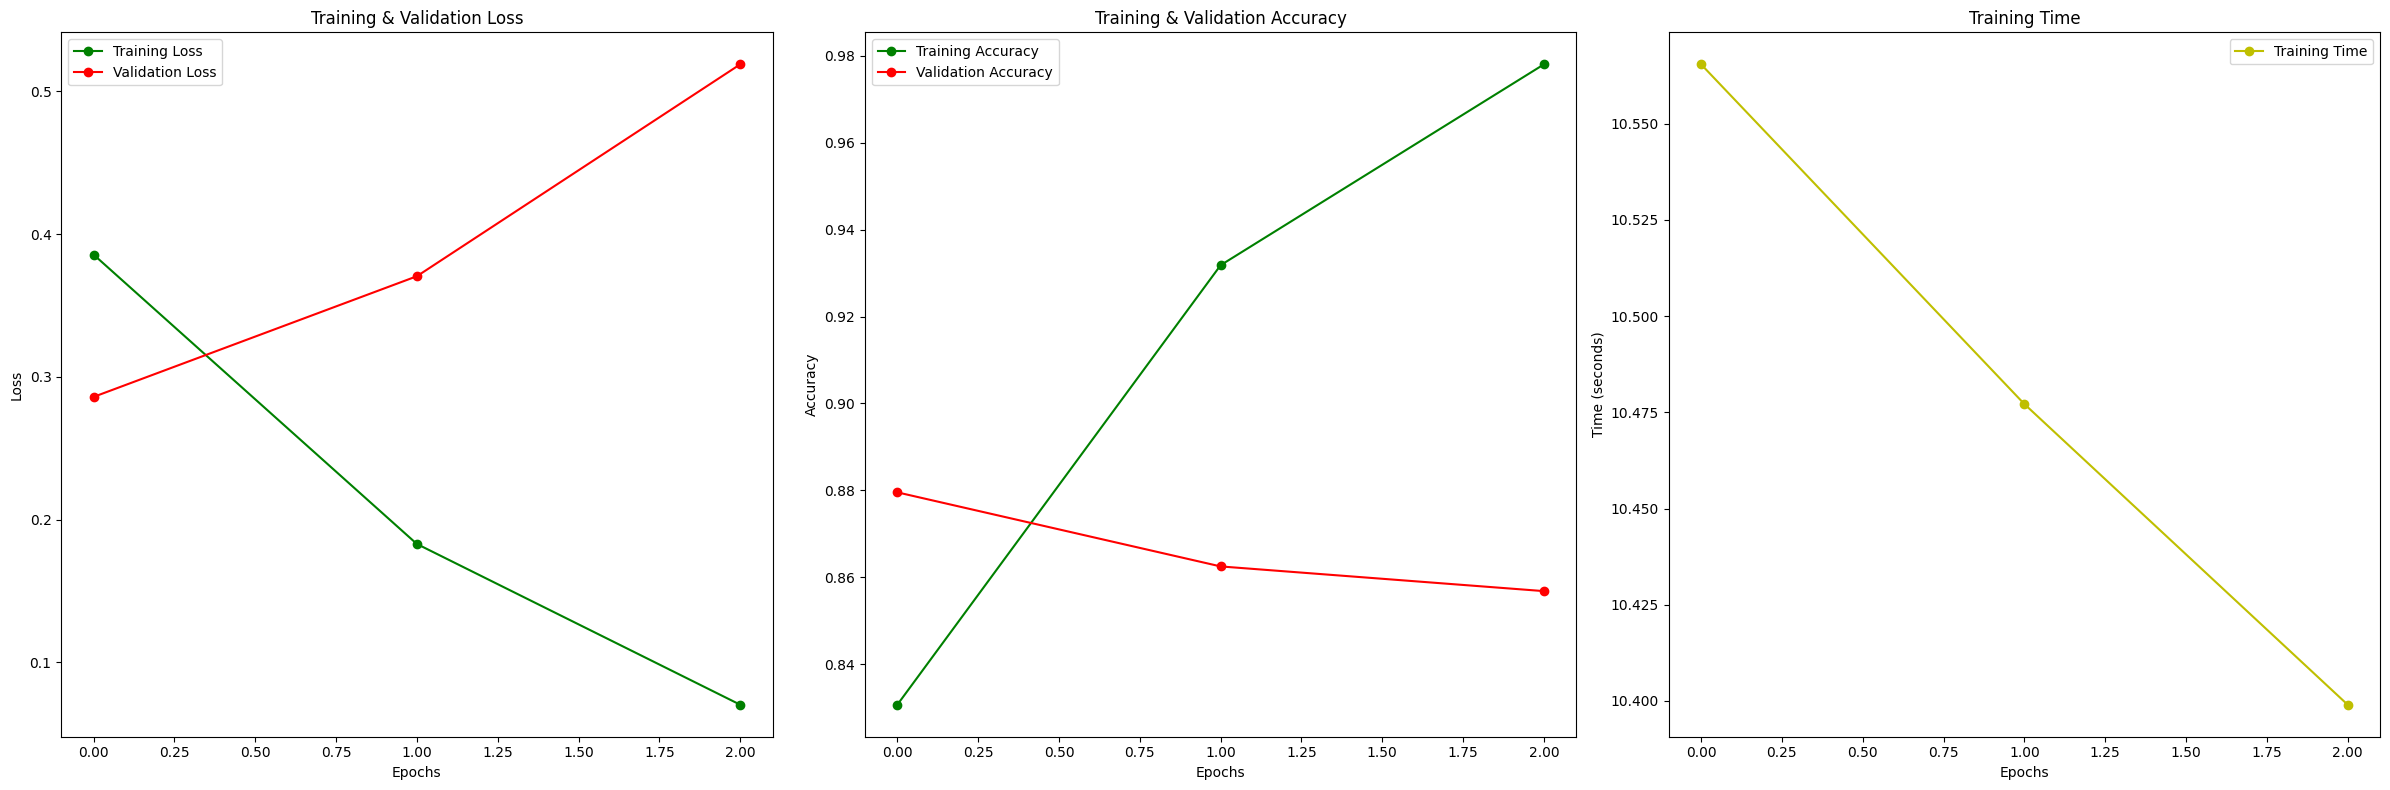

In [38]:
import matplotlib.pyplot as plt

# Visualisasi Loss Training
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.plot(loss_values_exp1, 'g-o', label='Training Loss')
plt.plot(loss_valid_exp1, 'r-o', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualisasi Akurasi Training
plt.subplot(1, 3, 2)
plt.plot(train_accuracy_values_exp1, 'g-o', label='Training Accuracy')
plt.plot(validation_accuracy_values_exp1, 'r-o', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Training Time
plt.subplot(1, 3, 3)
plt.plot(training_times_exp1, 'y-o', label='Training Time')
plt.title('Training Time')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

## Evaluasi

Akurasi

In [39]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch  = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 880 test sentences
 DONE.


In [40]:
from sklearn.metrics import accuracy_score

# Combine the predictions and true labels
predictions = np.concatenate(prediction, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

# Apply argmax to get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 86.59%


In [41]:
from sklearn.metrics import classification_report

# Generate classification report with 4 decimal places
report = classification_report(true_labels, predicted_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8836    0.8435    0.8631       441
           1     0.8497    0.8884    0.8686       439

    accuracy                         0.8659       880
   macro avg     0.8666    0.8660    0.8659       880
weighted avg     0.8667    0.8659    0.8658       880



In [42]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

Text(113.9222222222222, 0.5, 'predicted label')

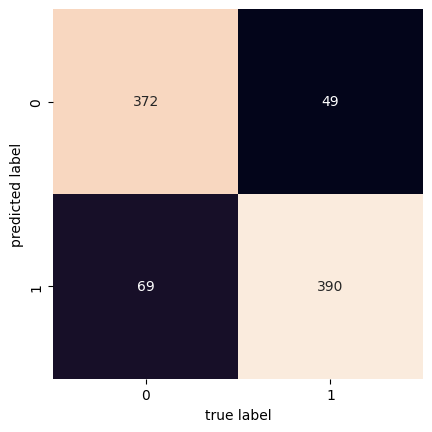

In [43]:
# Visualize the confusion matrix
mat = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [44]:
accuracy_exp1 = accuracy

In [45]:
import os

output_dir = './model_save/'


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
bert_tokenizer.save_pretrained(output_dir)

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [46]:
from transformers import pipeline

model_1 = BertForSequenceClassification.from_pretrained('/content/model_save')
tokenizer = BertTokenizer.from_pretrained('/content/model_save')

# Inisialisasi pipeline untuk klasifikasi teks dengan model BERT
classifier = pipeline(
    'text-classification',
    model=model_1,
    tokenizer=tokenizer
)

In [47]:
# Contoh penggunaan untuk prediksi
kalimat_1 = "Siapa namamu?"
kalimat_2 = "Lah paling cuman bisa nangis"
hasil_prediksi_1 = classifier(kalimat_1)
hasil_prediksi_2 = classifier(kalimat_2)
print(hasil_prediksi_1)
print(hasil_prediksi_2)

[{'label': 'LABEL_0', 'score': 0.9991311430931091}]
[{'label': 'LABEL_1', 'score': 0.9952719807624817}]


In [48]:
! tar -czvf bert_sarcasm_indo_exp1.tar.gz /content/model_save

tar: Removing leading `/' from member names
/content/model_save/
/content/model_save/special_tokens_map.json
/content/model_save/pytorch_model.bin
/content/model_save/vocab.txt
/content/model_save/tokenizer_config.json
/content/model_save/config.json


In [49]:
! cp /content/bert_sarcasm_indo_exp1.tar.gz "/content/drive/MyDrive/Colab Notebooks/bert_sarcasm_indo_exp1.tar.gz"

## Prediksi Data Baru

In [50]:
data = "/content/drive/MyDrive/sarcasm/data_test_pra (no label).xlsx"
data = pd.read_excel(data)
data.head()

,Text,Label
0,saatnya menggatot!!!!,1
1,bukti jokowi orang nya jauh lebih rendah hati,0
2,yap! saat ini aku tidak punya tenaga untuk ber...,1
3,kalian bangga punya presiden bermuka norak sep...,1
4,rumah makan nya enak masakan nya lengkap dan ...,0


In [51]:
# Membuat kolom 'predictions' untuk menyimpan hasil prediksi
data['predictions'] = data['Text'].apply(lambda text: classifier(text)[0]['label'] if isinstance(text, str) else None)

# Ganti 'hasil_prediksi.xlsx' dengan nama file Excel untuk menyimpan hasil prediksi
data.to_excel('hasil_prediksi1.xlsx', index=False)


# Pemodelan Data 2

Pembagian Data 60:20:20

Size_batch = 16

Epoch = 3

attention_probs_dropout_prob=0.5

hidden_dropout_prob=0.5

lr = 2e-5

eps = 1e-8

## Pemodelan pre-Trained BERT

In [52]:
torch.cuda.is_available()

True

In [53]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p1',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
    attention_probs_dropout_prob=0.5,
    hidden_dropout_prob=0.5
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
model.to(device)
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [55]:
from transformers import get_linear_schedule_with_warmup

epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps
                                            )

In [56]:
def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [57]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

## Training BERT

In [58]:
device = torch.device("cuda:0")

In [59]:
# Karena menggunakan tugas klasifikasi biner (sarkasme atau bukan sarkasme)
loss_fn = torch.nn.CrossEntropyLoss()

In [60]:
import random

# Set seed untuk reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# List untuk menyimpan data pelatihan dan validasi
loss_values = []
train_accuracy_values = []
validation_accuracy_values = []
validation_loss_values = []  # Tambah list untuk menyimpan validation loss
training_times = []

# Loop pelatihan
for epoch_i in range(0, epochs):

  #===============================
  #          Training
  #===============================

    print("======== Epoch {:} / {:} ========".format(epoch_i + 1, epochs))
    print("Training...")

    t0 = time.time()

    total_loss = 0

    model.train()

    # Inisialisasi akurasi training untuk setiap epoch
    total_train_accuracy = 0
    total_train_steps = 0

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print("Batch {:>5,} of {:>5,}. Elapsed: {:}".format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

        # Hitung akurasi training untuk batch saat ini
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        batch_train_accuracy = flat_accuracy(logits, label_ids)

        total_train_accuracy += batch_train_accuracy
        total_train_steps += 1

    avg_train_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_train_loss)

    # Hitung rata-rata akurasi training untuk setiap epoch
    epoch_train_accuracy = total_train_accuracy / total_train_steps
    train_accuracy_values.append(epoch_train_accuracy)

    print("   Average training loss: {0:.2f}".format(avg_train_loss))
    print("   Training epoch took: {:}".format(format_time(time.time() - t0)))
    print("   Average training accuracy: {0:.2f}".format(epoch_train_accuracy))

  #===============================
  #          Validation
  #===============================

    # Validasi
    print("Running Validation...")

    t0 = time.time()

    total_validation_loss = 0
    total_validation_batches = 0

    model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:

        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

        # Hitung validation loss
        eval_loss = loss_fn(outputs[0], b_labels)  # Gantilah loss_fn dengan loss function yang sesuai
        eval_loss = eval_loss.mean().item()
        total_validation_loss += eval_loss
        total_validation_batches += 1

    # Simpan data akurasi dan waktu validasi
    validation_accuracy_values.append(eval_accuracy / nb_eval_steps)
    training_times.append(time.time() - t0)
    avg_validation_loss = total_validation_loss / total_validation_batches
    validation_loss_values.append(avg_validation_loss)

    print("   Accuracy: {0:.2f}".format(eval_accuracy / nb_eval_steps))
    print("   Validation Loss: {0:.2f}".format(avg_validation_loss))
    print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======== Epoch 1 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:22
Batch    80 of   165. Elapsed: 0:00:44
Batch   120 of   165. Elapsed: 0:01:05
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss: 0.48
   Training epoch took: 0:01:29
   Average training accuracy: 0.76
Running Validation...
   Accuracy: 0.85
   Validation Loss: 0.34
   Validation took: 0:00:10
======== Epoch 2 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:22
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:05
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss: 0.37
   Training epoch took: 0:01:29
   Average training accuracy: 0.83
Running Validation...
   Accuracy: 0.85
   Validation Loss: 0.32
   Validation took: 0:00:10
======== Epoch 3 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:21
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:04
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss

In [61]:
loss_values_exp2 = loss_values
train_accuracy_values_exp2 = train_accuracy_values
loss_valid_exp2 = validation_loss_values
validation_accuracy_values_exp2 = validation_accuracy_values
training_times_exp2 = training_times

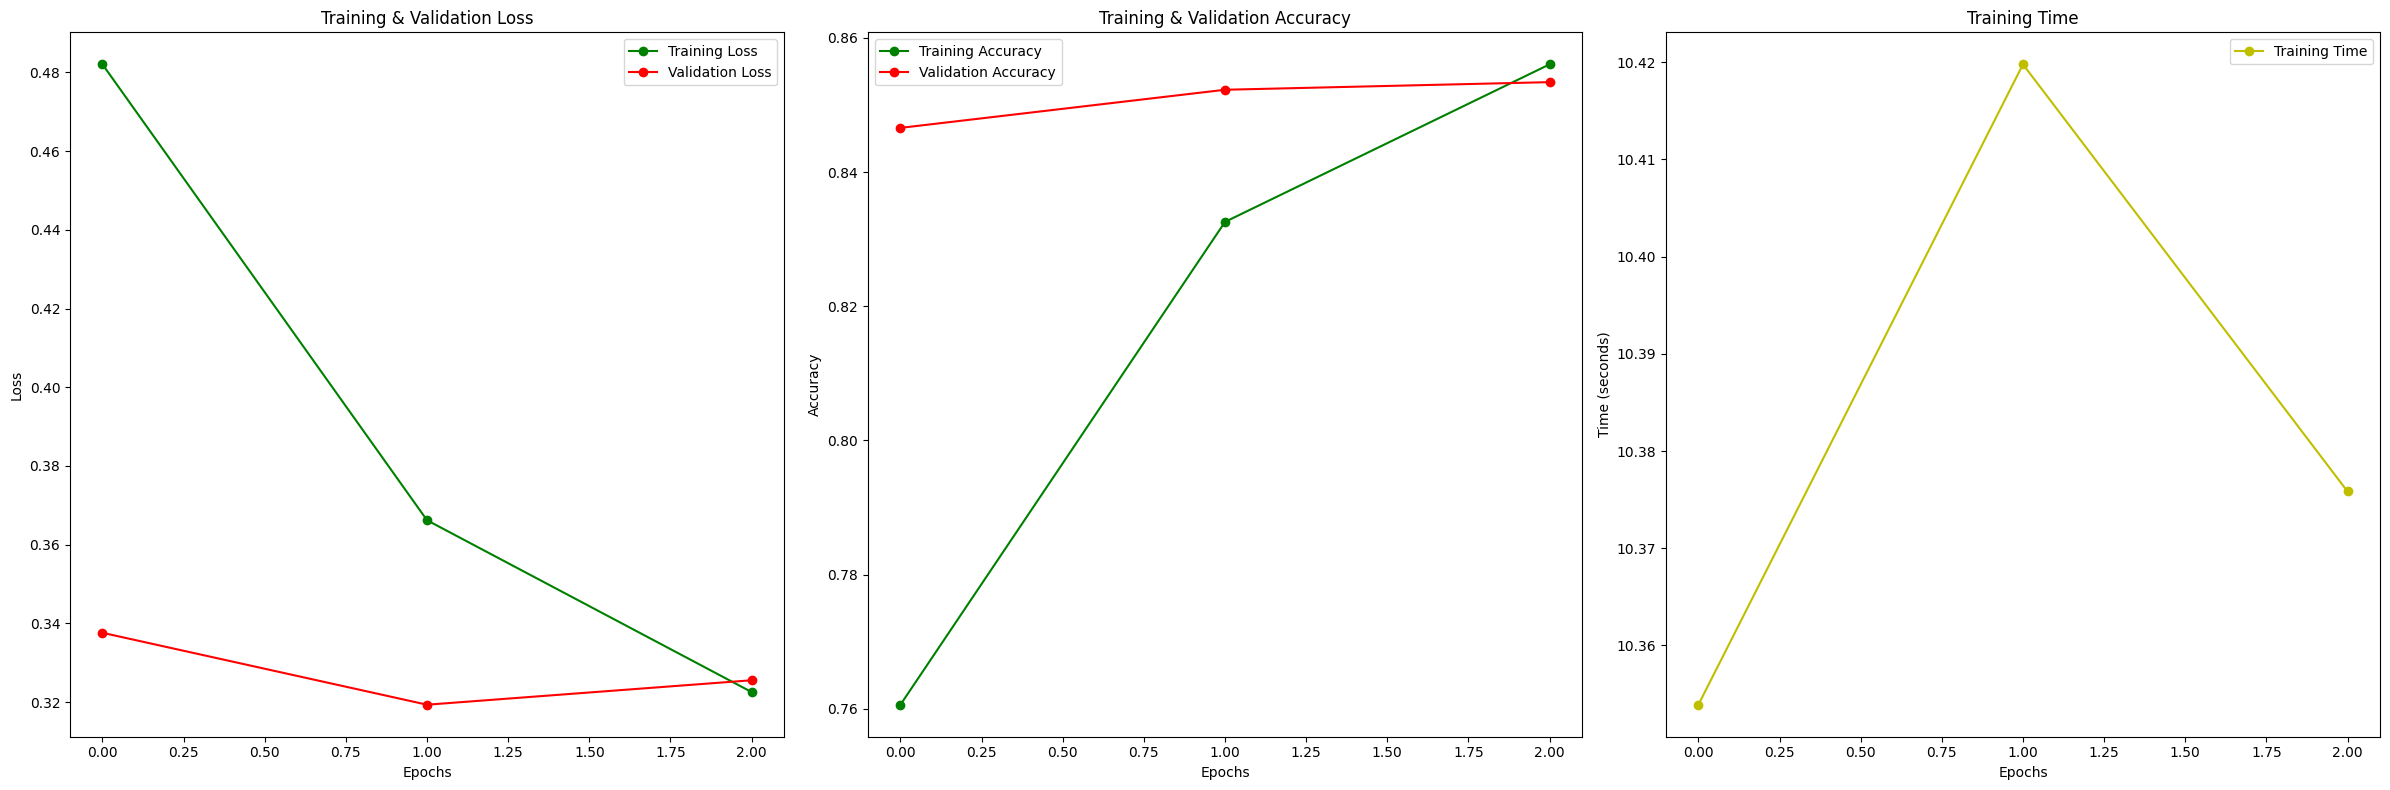

In [62]:
import matplotlib.pyplot as plt

# Visualisasi Loss Training
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.plot(loss_values_exp2, 'g-o', label='Training Loss')
plt.plot(loss_valid_exp2, 'r-o', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualisasi Akurasi Training
plt.subplot(1, 3, 2)
plt.plot(train_accuracy_values_exp2, 'g-o', label='Training Accuracy')
plt.plot(validation_accuracy_values_exp2, 'r-o', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Training Time
plt.subplot(1, 3, 3)
plt.plot(training_times_exp2, 'y-o', label='Training Time')
plt.title('Training Time')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

## Evaluasi

In [63]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch  = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 880 test sentences
 DONE.


In [64]:
from sklearn.metrics import accuracy_score

# Combine the predictions and true labels
predictions = np.concatenate(prediction, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

# Apply argmax to get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 82.84%


In [65]:
from sklearn.metrics import classification_report

# Generate classification report with 4 decimal places
report = classification_report(true_labels, predicted_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8452    0.8050    0.8246       441
           1     0.8130    0.8519    0.8320       439

    accuracy                         0.8284       880
   macro avg     0.8291    0.8285    0.8283       880
weighted avg     0.8292    0.8284    0.8283       880



In [66]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

Text(113.9222222222222, 0.5, 'predicted label')

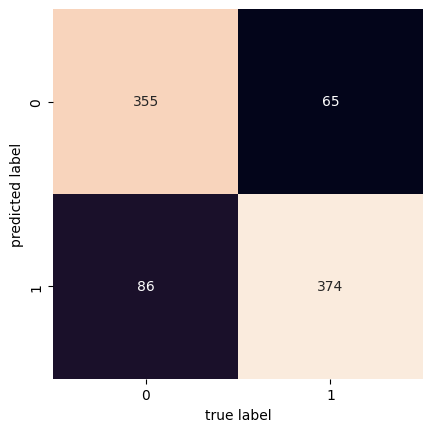

In [67]:
# Visualize the confusion matrix
mat = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [68]:
accuracy_exp2 = accuracy

In [69]:
import os

output_dir = './model_save/'


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
bert_tokenizer.save_pretrained(output_dir)

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [70]:
from transformers import pipeline

model_1 = BertForSequenceClassification.from_pretrained('/content/model_save')
tokenizer = BertTokenizer.from_pretrained('/content/model_save')

# Inisialisasi pipeline untuk klasifikasi teks dengan model BERT
classifier = pipeline(
    'text-classification',
    model=model_1,
    tokenizer=tokenizer
)

In [71]:
# Contoh penggunaan untuk prediksi
kalimat_1 = "Siapa namamu?"
kalimat_2 = "Lah paling cuman bisa nangis"
hasil_prediksi_1 = classifier(kalimat_1)
hasil_prediksi_2 = classifier(kalimat_2)
print(hasil_prediksi_1)
print(hasil_prediksi_2)

[{'label': 'LABEL_1', 'score': 0.7293763160705566}]
[{'label': 'LABEL_1', 'score': 0.9668192267417908}]


In [72]:
! tar -czvf bert_sarcasm_indo_exp2.tar.gz /content/model_save

tar: Removing leading `/' from member names
/content/model_save/
/content/model_save/special_tokens_map.json
/content/model_save/pytorch_model.bin
/content/model_save/vocab.txt
/content/model_save/tokenizer_config.json
/content/model_save/config.json


In [73]:
! cp /content/bert_sarcasm_indo_exp2.tar.gz "/content/drive/MyDrive/Colab Notebooks/bert_sarcasm_indo_exp2.tar.gz"

## Prediksi Data Baru

In [74]:
data = "/content/drive/MyDrive/sarcasm/data_test_pra (no label).xlsx"
data = pd.read_excel(data)
data.head()

,Text,Label
0,saatnya menggatot!!!!,1
1,bukti jokowi orang nya jauh lebih rendah hati,0
2,yap! saat ini aku tidak punya tenaga untuk ber...,1
3,kalian bangga punya presiden bermuka norak sep...,1
4,rumah makan nya enak masakan nya lengkap dan ...,0


In [75]:
# Membuat kolom 'predictions' untuk menyimpan hasil prediksi
data['predictions'] = data['Text'].apply(lambda text: classifier(text)[0]['label'] if isinstance(text, str) else None)

# Ganti 'hasil_prediksi.xlsx' dengan nama file Excel untuk menyimpan hasil prediksi
data.to_excel('hasil_prediksi2.xlsx', index=False)


# Pemodelan Data 3

Pembagian Data 60:20:20

Size_batch = 16

Epoch = 3

attention_probs_dropout_prob=0.5

hidden_dropout_prob=0.5

lr = 2e-5

eps = 1e-8

num_warmup_steps = 16

## Pemodelan pre-Trained BERT

In [76]:
torch.cuda.is_available()

True

In [77]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p1',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
    attention_probs_dropout_prob=0.4,
    hidden_dropout_prob=0.4
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
model.to(device)
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [79]:
from transformers import get_linear_schedule_with_warmup

epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps
                                            )

In [80]:
def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [81]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

## Training BERT

In [82]:
device = torch.device("cuda:0")

In [83]:
# Karena menggunakan tugas klasifikasi biner (sarkasme atau bukan sarkasme)
loss_fn = torch.nn.CrossEntropyLoss()

In [84]:
import random

# Set seed untuk reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# List untuk menyimpan data pelatihan dan validasi
loss_values = []
train_accuracy_values = []
validation_accuracy_values = []
validation_loss_values = []  # Tambah list untuk menyimpan validation loss
training_times = []

# Loop pelatihan
for epoch_i in range(0, epochs):

  #===============================
  #          Training
  #===============================

    print("======== Epoch {:} / {:} ========".format(epoch_i + 1, epochs))
    print("Training...")

    t0 = time.time()

    total_loss = 0

    model.train()

    # Inisialisasi akurasi training untuk setiap epoch
    total_train_accuracy = 0
    total_train_steps = 0

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print("Batch {:>5,} of {:>5,}. Elapsed: {:}".format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

        # Hitung akurasi training untuk batch saat ini
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        batch_train_accuracy = flat_accuracy(logits, label_ids)

        total_train_accuracy += batch_train_accuracy
        total_train_steps += 1

    avg_train_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_train_loss)

    # Hitung rata-rata akurasi training untuk setiap epoch
    epoch_train_accuracy = total_train_accuracy / total_train_steps
    train_accuracy_values.append(epoch_train_accuracy)

    print("   Average training loss: {0:.2f}".format(avg_train_loss))
    print("   Training epoch took: {:}".format(format_time(time.time() - t0)))
    print("   Average training accuracy: {0:.2f}".format(epoch_train_accuracy))

  #===============================
  #          Validation
  #===============================

    # Validasi
    print("Running Validation...")

    t0 = time.time()

    total_validation_loss = 0
    total_validation_batches = 0

    model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:

        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

        # Hitung validation loss
        eval_loss = loss_fn(outputs[0], b_labels)  # Gantilah loss_fn dengan loss function yang sesuai
        eval_loss = eval_loss.mean().item()
        total_validation_loss += eval_loss
        total_validation_batches += 1

    # Simpan data akurasi dan waktu validasi
    validation_accuracy_values.append(eval_accuracy / nb_eval_steps)
    training_times.append(time.time() - t0)
    avg_validation_loss = total_validation_loss / total_validation_batches
    validation_loss_values.append(avg_validation_loss)

    print("   Accuracy: {0:.2f}".format(eval_accuracy / nb_eval_steps))
    print("   Validation Loss: {0:.2f}".format(avg_validation_loss))
    print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======== Epoch 1 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:22
Batch    80 of   165. Elapsed: 0:00:44
Batch   120 of   165. Elapsed: 0:01:05
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss: 0.44
   Training epoch took: 0:01:29
   Average training accuracy: 0.79
Running Validation...
   Accuracy: 0.83
   Validation Loss: 0.35
   Validation took: 0:00:10
======== Epoch 2 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:22
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:04
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss: 0.32
   Training epoch took: 0:01:29
   Average training accuracy: 0.86
Running Validation...
   Accuracy: 0.85
   Validation Loss: 0.30
   Validation took: 0:00:10
======== Epoch 3 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:21
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:04
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss

In [85]:
loss_values_exp3 = loss_values
train_accuracy_values_exp3 = train_accuracy_values
loss_valid_exp3 = validation_loss_values
validation_accuracy_values_exp3 = validation_accuracy_values
training_times_exp3 = training_times

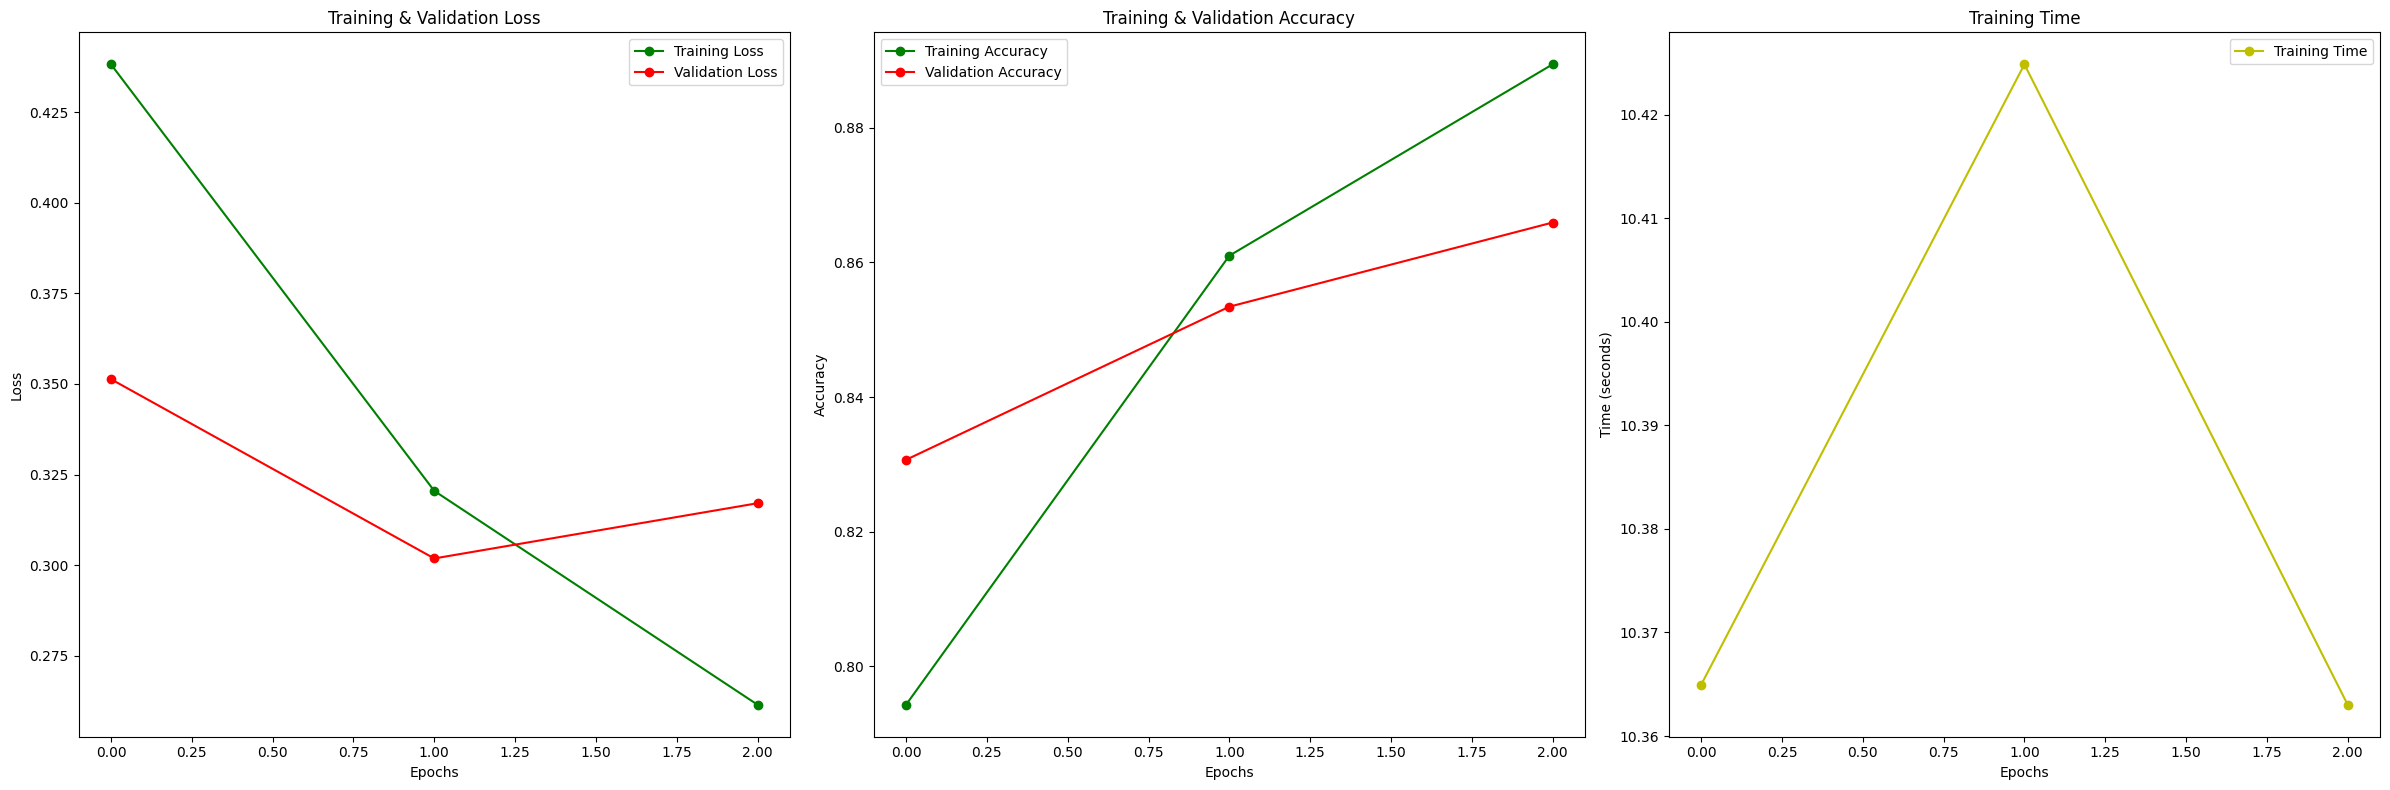

In [86]:
import matplotlib.pyplot as plt

# Visualisasi Loss Training
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.plot(loss_values_exp3, 'g-o', label='Training Loss')
plt.plot(loss_valid_exp3, 'r-o', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualisasi Akurasi Training
plt.subplot(1, 3, 2)
plt.plot(train_accuracy_values_exp3, 'g-o', label='Training Accuracy')
plt.plot(validation_accuracy_values_exp3, 'r-o', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Training Time
plt.subplot(1, 3, 3)
plt.plot(training_times_exp3, 'y-o', label='Training Time')
plt.title('Training Time')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

## Evaluasi

In [87]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch  = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 880 test sentences
 DONE.


In [88]:
from sklearn.metrics import accuracy_score

# Combine the predictions and true labels
predictions = np.concatenate(prediction, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

# Apply argmax to get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 84.77%


In [89]:
from sklearn.metrics import classification_report

# Generate classification report with 4 decimal places
report = classification_report(true_labels, predicted_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8497    0.8458    0.8477       441
           1     0.8458    0.8497    0.8477       439

    accuracy                         0.8477       880
   macro avg     0.8477    0.8477    0.8477       880
weighted avg     0.8477    0.8477    0.8477       880



In [90]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

Text(113.9222222222222, 0.5, 'predicted label')

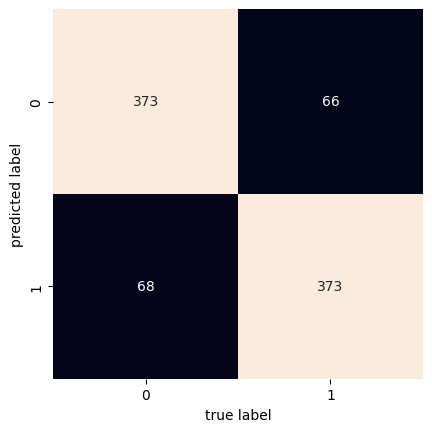

In [91]:
# Visualize the confusion matrix
mat = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [92]:
accuracy_exp3 = accuracy

In [93]:
import os

output_dir = './model_save/'


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
bert_tokenizer.save_pretrained(output_dir)

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [94]:
from transformers import pipeline

model_1 = BertForSequenceClassification.from_pretrained('/content/model_save')
tokenizer = BertTokenizer.from_pretrained('/content/model_save')

# Inisialisasi pipeline untuk klasifikasi teks dengan model BERT
classifier = pipeline(
    'text-classification',
    model=model_1,
    tokenizer=tokenizer
)

In [95]:
# Contoh penggunaan untuk prediksi
kalimat_1 = "Siapa namamu?"
kalimat_2 = "Lah paling cuman bisa nangis"
hasil_prediksi_1 = classifier(kalimat_1)
hasil_prediksi_2 = classifier(kalimat_2)
print(hasil_prediksi_1)
print(hasil_prediksi_2)

[{'label': 'LABEL_0', 'score': 0.697990894317627}]
[{'label': 'LABEL_1', 'score': 0.9678014516830444}]


In [96]:
! tar -czvf bert_sarcasm_indo_exp3.tar.gz /content/model_save

tar: Removing leading `/' from member names
/content/model_save/
/content/model_save/special_tokens_map.json
/content/model_save/pytorch_model.bin
/content/model_save/vocab.txt
/content/model_save/tokenizer_config.json
/content/model_save/config.json


In [97]:
! cp /content/bert_sarcasm_indo_exp3.tar.gz "/content/drive/MyDrive/Colab Notebooks/bert_sarcasm_indo_exp3.tar.gz"

## Prediksi Data Baru

In [98]:
data = "/content/drive/MyDrive/sarcasm/data_test_pra (no label).xlsx"
data = pd.read_excel(data)
data.head()

,Text,Label
0,saatnya menggatot!!!!,1
1,bukti jokowi orang nya jauh lebih rendah hati,0
2,yap! saat ini aku tidak punya tenaga untuk ber...,1
3,kalian bangga punya presiden bermuka norak sep...,1
4,rumah makan nya enak masakan nya lengkap dan ...,0


In [99]:
# Membuat kolom 'predictions' untuk menyimpan hasil prediksi
data['predictions'] = data['Text'].apply(lambda text: classifier(text)[0]['label'] if isinstance(text, str) else None)

# Ganti 'hasil_prediksi.xlsx' dengan nama file Excel untuk menyimpan hasil prediksi
data.to_excel('hasil_prediksi3.xlsx', index=False)


# Pemodelan Data 4

Pembagian Data 60:20:20

Size_batch = 16

Epoch = 3

attention_probs_dropout_prob=0.5

hidden_dropout_prob=0.5

lr = 5e-5

eps = 1e-8

num_warmup_steps = 16

## Pemodelan pre-Trained BERT

In [100]:
torch.cuda.is_available()

True

In [101]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p1',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
    attention_probs_dropout_prob=0.4,
    hidden_dropout_prob=0.4
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [102]:
model.to(device)
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [103]:
from transformers import get_linear_schedule_with_warmup

epochs = 3

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 16,
                                            num_training_steps = total_steps
                                            )

In [104]:
def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [105]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

## Training BERT

In [106]:
device = torch.device("cuda:0")

In [107]:
# Karena menggunakan tugas klasifikasi biner (sarkasme atau bukan sarkasme)
loss_fn = torch.nn.CrossEntropyLoss()

In [108]:
import random

# Set seed untuk reproducibility
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# List untuk menyimpan data pelatihan dan validasi
loss_values = []
train_accuracy_values = []
validation_accuracy_values = []
validation_loss_values = []  # Tambah list untuk menyimpan validation loss
training_times = []

# Loop pelatihan
for epoch_i in range(0, epochs):

  #===============================
  #          Training
  #===============================

    print("======== Epoch {:} / {:} ========".format(epoch_i + 1, epochs))
    print("Training...")

    t0 = time.time()

    total_loss = 0

    model.train()

    # Inisialisasi akurasi training untuk setiap epoch
    total_train_accuracy = 0
    total_train_steps = 0

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print("Batch {:>5,} of {:>5,}. Elapsed: {:}".format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

        # Hitung akurasi training untuk batch saat ini
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        batch_train_accuracy = flat_accuracy(logits, label_ids)

        total_train_accuracy += batch_train_accuracy
        total_train_steps += 1

    avg_train_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_train_loss)

    # Hitung rata-rata akurasi training untuk setiap epoch
    epoch_train_accuracy = total_train_accuracy / total_train_steps
    train_accuracy_values.append(epoch_train_accuracy)

    print("   Average training loss: {0:.2f}".format(avg_train_loss))
    print("   Training epoch took: {:}".format(format_time(time.time() - t0)))
    print("   Average training accuracy: {0:.2f}".format(epoch_train_accuracy))

  #===============================
  #          Validation
  #===============================

    # Validasi
    print("Running Validation...")

    t0 = time.time()

    total_validation_loss = 0
    total_validation_batches = 0

    model.eval()

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:

        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

        # Hitung validation loss
        eval_loss = loss_fn(outputs[0], b_labels)  # Gantilah loss_fn dengan loss function yang sesuai
        eval_loss = eval_loss.mean().item()
        total_validation_loss += eval_loss
        total_validation_batches += 1

    # Simpan data akurasi dan waktu validasi
    validation_accuracy_values.append(eval_accuracy / nb_eval_steps)
    training_times.append(time.time() - t0)
    avg_validation_loss = total_validation_loss / total_validation_batches
    validation_loss_values.append(avg_validation_loss)

    print("   Accuracy: {0:.2f}".format(eval_accuracy / nb_eval_steps))
    print("   Validation Loss: {0:.2f}".format(avg_validation_loss))
    print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======== Epoch 1 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:22
Batch    80 of   165. Elapsed: 0:00:44
Batch   120 of   165. Elapsed: 0:01:05
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss: 0.45
   Training epoch took: 0:01:29
   Average training accuracy: 0.78
Running Validation...
   Accuracy: 0.82
   Validation Loss: 0.35
   Validation took: 0:00:10
======== Epoch 2 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:22
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:04
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss: 0.32
   Training epoch took: 0:01:28
   Average training accuracy: 0.86
Running Validation...
   Accuracy: 0.86
   Validation Loss: 0.30
   Validation took: 0:00:10
======== Epoch 3 / 3 ========
Training...
Batch    40 of   165. Elapsed: 0:00:21
Batch    80 of   165. Elapsed: 0:00:43
Batch   120 of   165. Elapsed: 0:01:04
Batch   160 of   165. Elapsed: 0:01:26
   Average training loss

In [109]:
loss_values_exp4 = loss_values
train_accuracy_values_exp4 = train_accuracy_values
loss_valid_exp4 = validation_loss_values
validation_accuracy_values_exp4 = validation_accuracy_values
training_times_exp4 = training_times

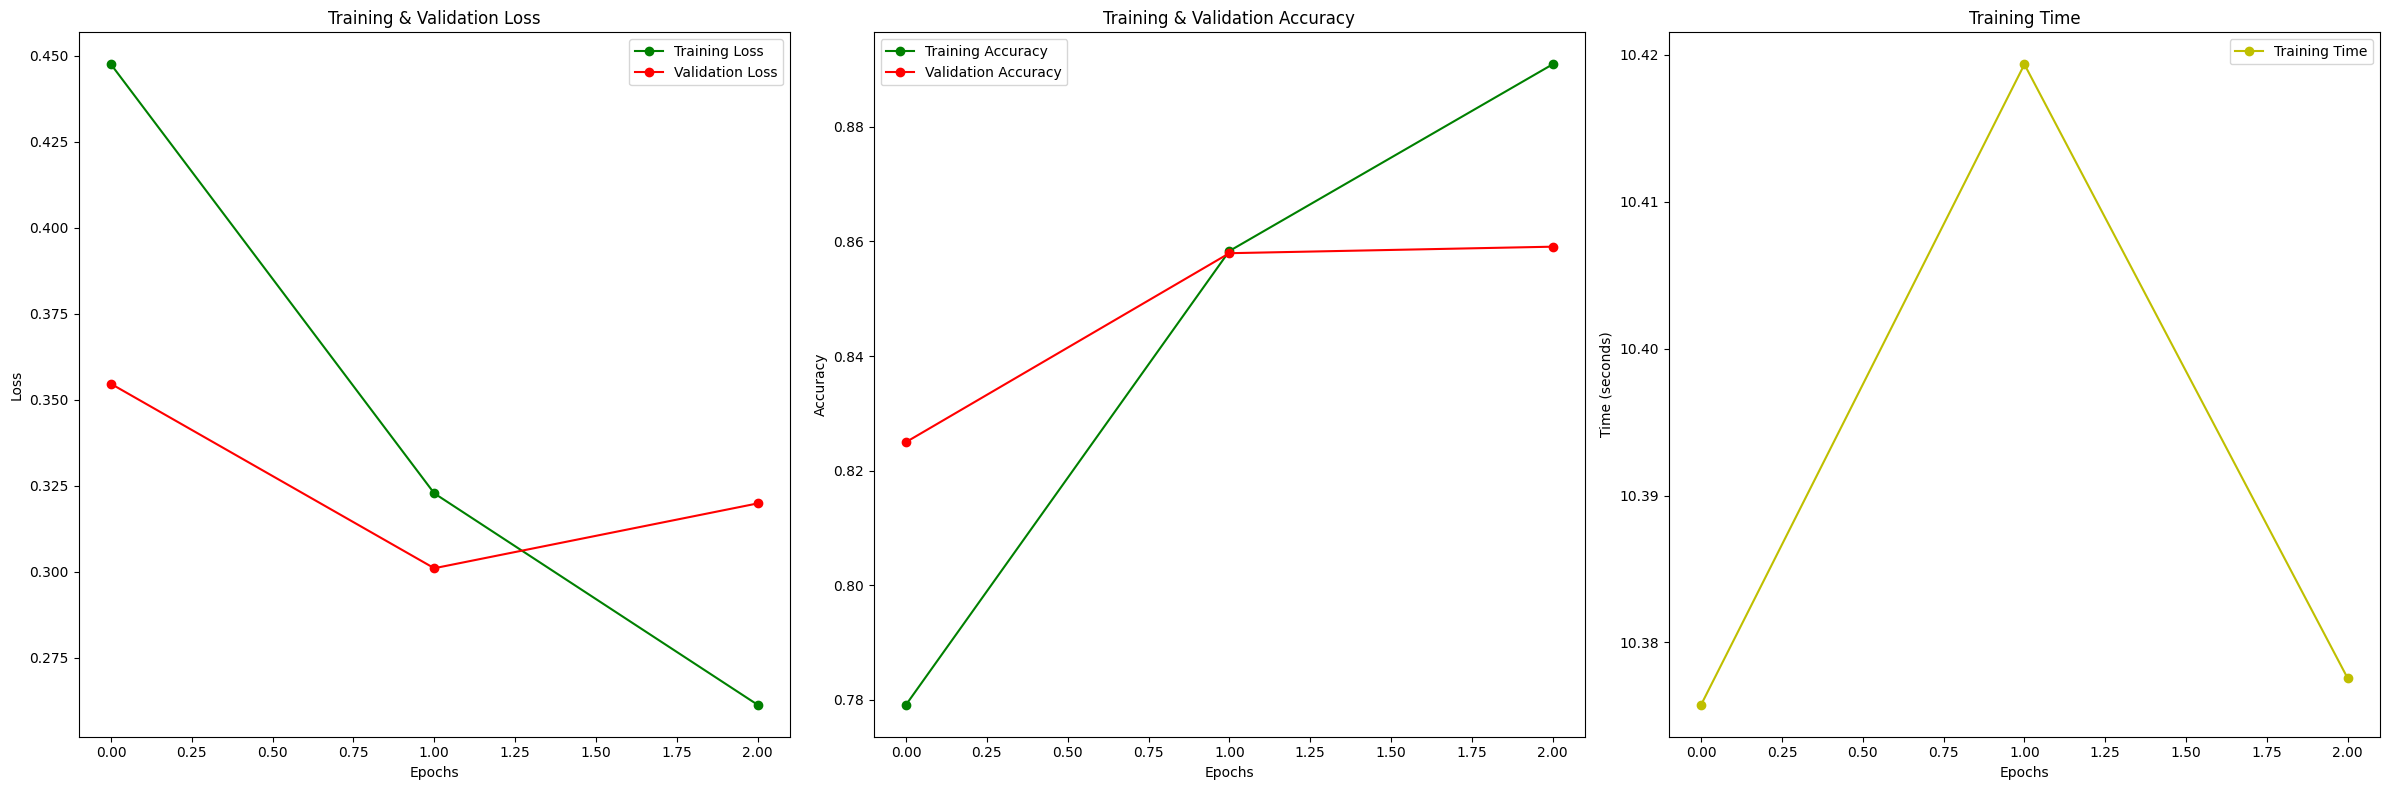

In [110]:
import matplotlib.pyplot as plt

# Visualisasi Loss Training
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.plot(loss_values_exp4, 'g-o', label='Training Loss')
plt.plot(loss_valid_exp4, 'r-o', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualisasi Akurasi Training
plt.subplot(1, 3, 2)
plt.plot(train_accuracy_values_exp4, 'g-o', label='Training Accuracy')
plt.plot(validation_accuracy_values_exp4, 'r-o', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Training Time
plt.subplot(1, 3, 3)
plt.plot(training_times_exp4, 'y-o', label='Training Time')
plt.title('Training Time')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

## Evaluasi

In [111]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch  = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 880 test sentences
 DONE.


In [112]:
from sklearn.metrics import accuracy_score

# Combine the predictions and true labels
predictions = np.concatenate(prediction, axis=0)
true_labels = np.concatenate(true_labels, axis=0)

# Apply argmax to get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 85.00%


In [113]:
from sklearn.metrics import classification_report

# Generate classification report with 4 decimal places
report = classification_report(true_labels, predicted_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8472    0.8549    0.8510       441
           1     0.8529    0.8451    0.8490       439

    accuracy                         0.8500       880
   macro avg     0.8500    0.8500    0.8500       880
weighted avg     0.8500    0.8500    0.8500       880



In [114]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

Text(113.9222222222222, 0.5, 'predicted label')

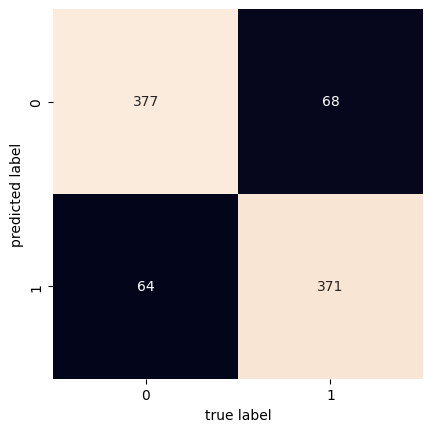

In [115]:
# Visualize the confusion matrix
mat = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [116]:
accuracy_exp4 = accuracy

In [117]:
import os

output_dir = './model_save/'


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
bert_tokenizer.save_pretrained(output_dir)

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [118]:
from transformers import pipeline

model_1 = BertForSequenceClassification.from_pretrained('/content/model_save')
tokenizer = BertTokenizer.from_pretrained('/content/model_save')

# Inisialisasi pipeline untuk klasifikasi teks dengan model BERT
classifier = pipeline(
    'text-classification',
    model=model_1,
    tokenizer=tokenizer
)

In [119]:
# Contoh penggunaan untuk prediksi
kalimat_1 = "Siapa namamu?"
kalimat_2 = "Lah paling cuman bisa nangis"
hasil_prediksi_1 = classifier(kalimat_1)
hasil_prediksi_2 = classifier(kalimat_2)
print(hasil_prediksi_1)
print(hasil_prediksi_2)

[{'label': 'LABEL_0', 'score': 0.7122101187705994}]
[{'label': 'LABEL_1', 'score': 0.9731906056404114}]


In [120]:
! tar -czvf bert_sarcasm_indo_exp4.tar.gz /content/model_save

tar: Removing leading `/' from member names
/content/model_save/
/content/model_save/special_tokens_map.json
/content/model_save/pytorch_model.bin
/content/model_save/vocab.txt
/content/model_save/tokenizer_config.json
/content/model_save/config.json


In [121]:
! cp /content/bert_sarcasm_indo_exp4.tar.gz "/content/drive/MyDrive/Colab Notebooks/bert_sarcasm_indo_exp4.tar.gz"

## Prediksi Data Baru

In [122]:
data = "/content/drive/MyDrive/sarcasm/data_test_pra (no label).xlsx"
data = pd.read_excel(data)
data.head()

,Text,Label
0,saatnya menggatot!!!!,1
1,bukti jokowi orang nya jauh lebih rendah hati,0
2,yap! saat ini aku tidak punya tenaga untuk ber...,1
3,kalian bangga punya presiden bermuka norak sep...,1
4,rumah makan nya enak masakan nya lengkap dan ...,0


In [123]:
# Membuat kolom 'predictions' untuk menyimpan hasil prediksi
data['predictions'] = data['Text'].apply(lambda text: classifier(text)[0]['label'] if isinstance(text, str) else None)

# Ganti 'hasil_prediksi.xlsx' dengan nama file Excel untuk menyimpan hasil prediksi
data.to_excel('hasil_prediksi4.xlsx', index=False)


# Perbandingan Model

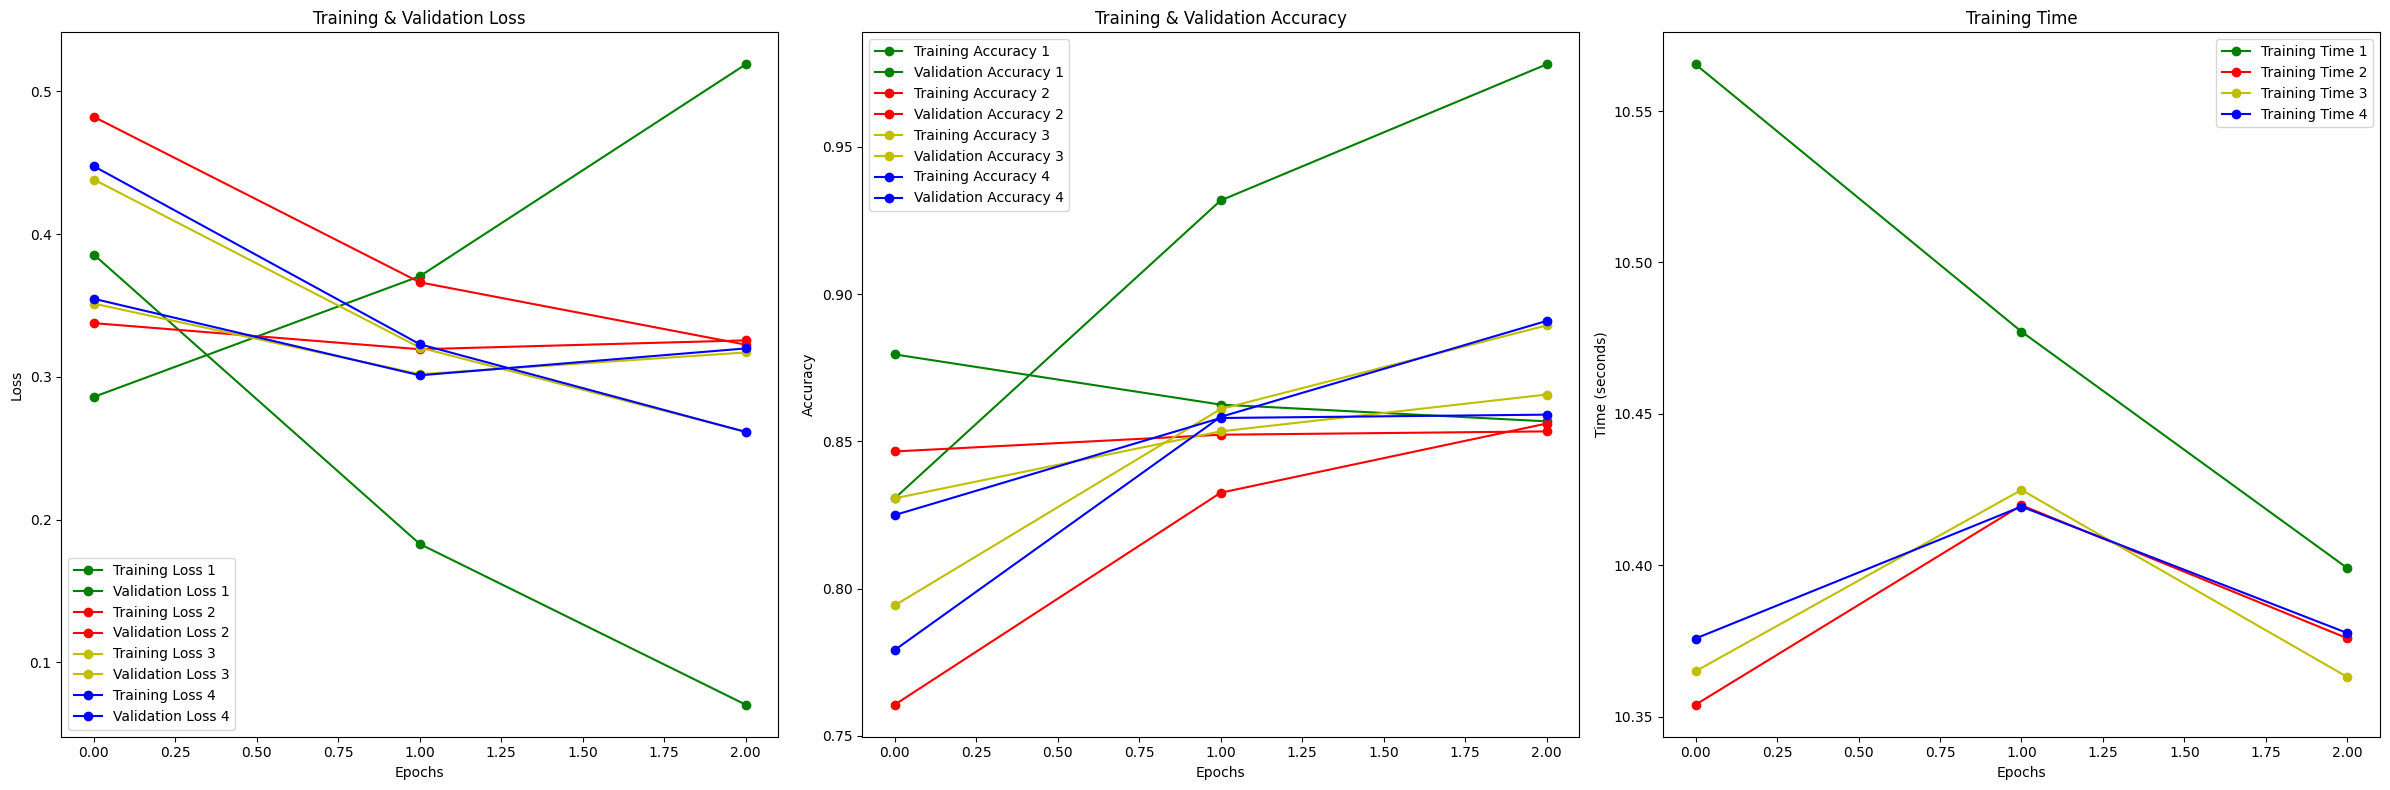

In [126]:
import matplotlib.pyplot as plt

# Visualisasi Loss Training
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.plot(loss_values_exp1, 'g-o', label='Training Loss 1')
plt.plot(loss_valid_exp1, 'g-o', label='Validation Loss 1')
plt.plot(loss_values_exp2, 'r-o', label='Training Loss 2')
plt.plot(loss_valid_exp2, 'r-o', label='Validation Loss 2')
plt.plot(loss_values_exp3, 'y-o', label='Training Loss 3')
plt.plot(loss_valid_exp3, 'y-o', label='Validation Loss 3')
plt.plot(loss_values_exp4, 'b-o', label='Training Loss 4')
plt.plot(loss_valid_exp4, 'b-o', label='Validation Loss 4')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Visualisasi Akurasi Training
plt.subplot(1, 3, 2)
plt.plot(train_accuracy_values_exp1, 'g-o', label='Training Accuracy 1')
plt.plot(validation_accuracy_values_exp1, 'g-o', label='Validation Accuracy 1')
plt.plot(train_accuracy_values_exp2, 'r-o', label='Training Accuracy 2')
plt.plot(validation_accuracy_values_exp2, 'r-o', label='Validation Accuracy 2')
plt.plot(train_accuracy_values_exp3, 'y-o', label='Training Accuracy 3')
plt.plot(validation_accuracy_values_exp3, 'y-o', label='Validation Accuracy 3')
plt.plot(train_accuracy_values_exp4, 'b-o', label='Training Accuracy 4')
plt.plot(validation_accuracy_values_exp4, 'b-o', label='Validation Accuracy 4')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Training Time
plt.subplot(1, 3, 3)
plt.plot(training_times_exp1, 'g-o', label='Training Time 1')
plt.plot(training_times_exp2, 'r-o', label='Training Time 2')
plt.plot(training_times_exp3, 'y-o', label='Training Time 3')
plt.plot(training_times_exp4, 'b-o', label='Training Time 4')
plt.title('Training Time')
plt.xlabel('Epochs')
plt.ylabel('Time (seconds)')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

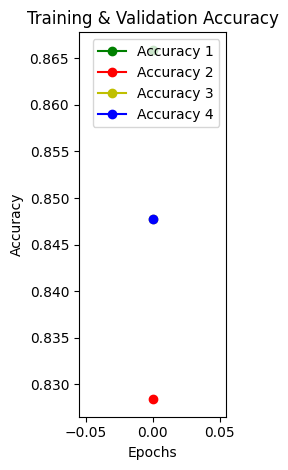

In [127]:
import matplotlib.pyplot as plt

# Visualisasi Akurasi Akhir
plt.subplot(1, 3, 2)
plt.plot(accuracy_exp1, 'g-o', label='Accuracy 1')
plt.plot(accuracy_exp2, 'r-o', label='Accuracy 2')
plt.plot(accuracy_exp3, 'y-o', label='Accuracy 3')
plt.plot(accuracy_exp3, 'b-o', label='Accuracy 4')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()